

# RNN for Time Series

RNNs are used for sequence modeling. This tutorial will look at a time series data to be modeled and predicted using RNNs. 

In [1]:
#
# Import Libraries
#

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

In [2]:
# Your code to read data
df = pd.read_csv('RSCCASN.csv',index_col='DATE',parse_dates=True)


# Print first few rows of data
df.head()

,RSCCASN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [3]:
# Set name of column as 'Sales'. Use - df.columns 

df.columns = ['Sales']

df.head()

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


Plot your data - Year vs Sales

<Axes: xlabel='DATE'>

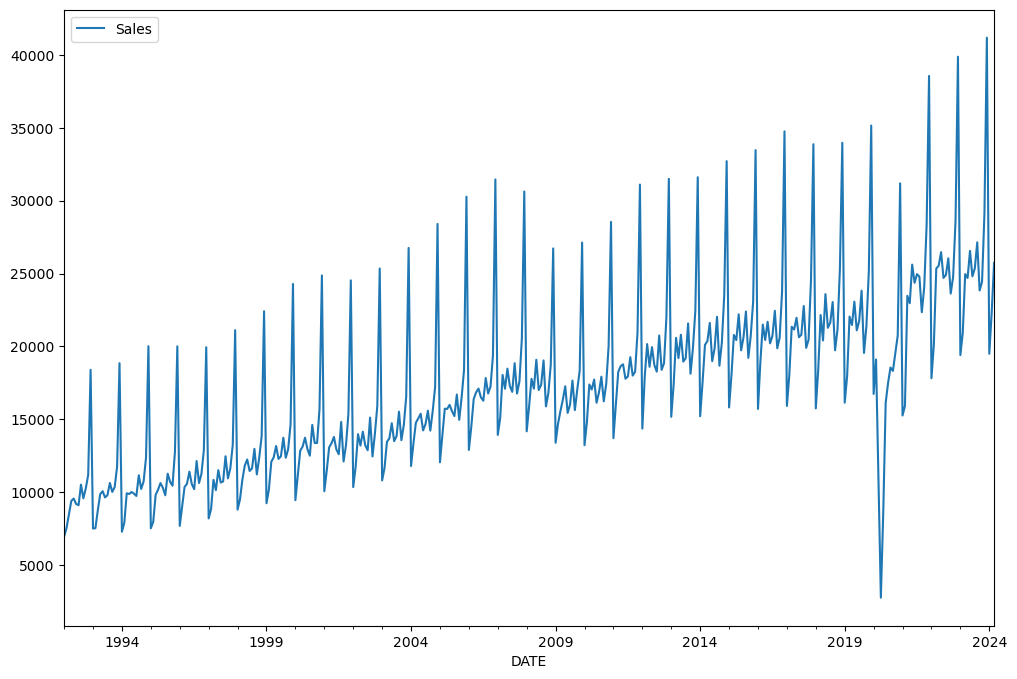

In [4]:
# Your code to plot Year vs Sales. Use either matplot library of pandas dataframe.
df.plot(figsize=(12,8))

### Next we will do Train Test Split. 

We will use last 1.5 year (18 month) samples for testing. Rest is for training.

In [5]:
# Assign variable test size = 18
test_size = 18

# Store length of data in variable length.
data_length = len(df)

# store training size in varialable train_size (Remember training size = total size - test_size)
train_size = data_length - test_size
train_size



369

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

In [8]:
#Assign the start of test index in data frame to variable test_index.  Remember, it is equal to the length of dataframe - test size
test_index =  train_size


Next, we will separate train and test datasets.

In [9]:
# Store all data from 0 to test_index in variable train. Hint - Use df.iloc.
# Store everthing from test_index to the last sample in test variable. Hint - Use df.iloc.
train = df.iloc[:test_index]
test = df.iloc[test_index:]


In [10]:
# Print the size of the train data
# Print the size of the test data
# Print the train data
# Print the test data
print(train.size)
print(test.size)
print(train)
print(test)



369
18
              Sales
DATE               
1992-01-01   6938.0
1992-02-01   7524.0
1992-03-01   8475.0
1992-04-01   9401.0
1992-05-01   9558.0
...             ...
2022-05-01  26470.0
2022-06-01  24701.0
2022-07-01  24904.0
2022-08-01  26049.0
2022-09-01  23629.0

[369 rows x 1 columns]
              Sales
DATE               
2022-10-01  24787.0
2022-11-01  28645.0
2022-12-01  39883.0
2023-01-01  19405.0
2023-02-01  20937.0
2023-03-01  24963.0
2023-04-01  24700.0
2023-05-01  26557.0
2023-06-01  24809.0
2023-07-01  25364.0
2023-08-01  27143.0
2023-09-01  23840.0
2023-10-01  24438.0
2023-11-01  29150.0
2023-12-01  41187.0
2024-01-01  19497.0
2024-02-01  22309.0
2024-03-01  25738.0


### In Neural Networks, we need to Scale Data between 0-1

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
#
# Check if the data has been scaled properly
#
print(scaled_train.max())
print(scaled_test.max())
print(scaled_train.min())
print(scaled_test.min())


1.0
1.0732436054953647
0.0
0.4650117279124316


# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

# We will use 12 months as input and then predict the next month out


In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [15]:
X, y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11688819 0.13325142 0.15980677 0.18566402 0.19004803 0.17954875
 0.17734279 0.21671507 0.19046688 0.20948285 0.23553557 0.43680889]
Predict this y: 
 [[0.1326371]]


### Create the Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

In [17]:
# We're only using one feature in our time series
n_features = 1

# Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [18]:
# 
# Your code to create your own model
#
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [21]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

# Your code to create an object early-stop.

early_stop = EarlyStopping(monitor='val_loss',patience=5)

Now, fit your model.

In [23]:
# Your code to fit your model.
history =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30
357/357 [==============================] - 7s 15ms/step - loss: 0.0177 - val_loss: 0.0418
Epoch 2/30
357/357 [==============================] - 5s 15ms/step - loss: 0.0146 - val_loss: 0.0352
Epoch 3/30
357/357 [==============================] - 5s 15ms/step - loss: 0.0124 - val_loss: 0.0196
Epoch 4/30
357/357 [==============================] - 5s 13ms/step - loss: 0.0092 - val_loss: 0.0137
Epoch 5/30
357/357 [==============================] - 5s 14ms/step - loss: 0.0067 - val_loss: 0.0057
Epoch 6/30
357/357 [==============================] - 5s 15ms/step - loss: 0.0053 - val_loss: 0.0070
Epoch 7/30
357/357 [==============================] - 5s 15ms/step - loss: 0.0058 - val_loss: 0.0028
Epoch 8/30
357/357 [==============================] - 5s 14ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 9/30
357/357 [==============================] - 5s 14ms/step - loss: 0.0044 - val_loss: 0.0217
Epoch 10/30
357/357 [==============================] - 5s 14ms/step - loss: 0.0043 - val_lo

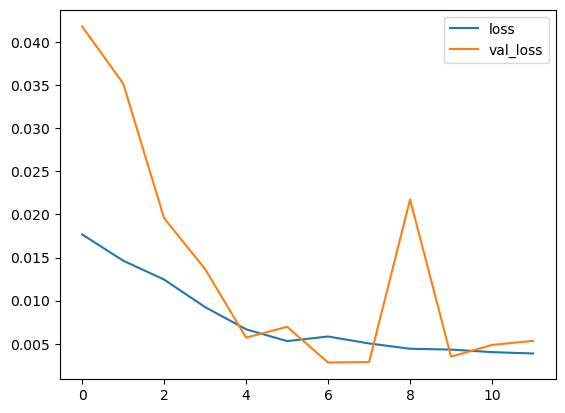

In [24]:
# Get Losses from dataframe (hint - model.history.history)- See previous week tutorial.
losses = pd.DataFrame(model.history.history)

# Plot losses in the dataframe.
losses.plot();

## Evaluate on Test Data

In [25]:
first_eval_batch = scaled_train[-length:]

In [26]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)


1/1 [==============================] - 0s 296ms/step


array([[0.6632548]], dtype=float32)

In [27]:
# compare with the true result:
scaled_test[0]

array([0.61529655])

#### Try predicting the series!

In [28]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 56ms/step


## Inverse Transformations and Compare

In [29]:
true_predictions = scaler.inverse_transform(test_predictions)

In [30]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

/var/folders/63/tn3fsjp55gb83_x7q74hppjw0000gn/T/ipykernel_816/1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


# Check and plot predictions

In [31]:
# Print the test variable.
test

,Sales,Predictions
DATE,,
2022-10-01,24787.0,26504.480807
2022-11-01,28645.0,31958.729527
2022-12-01,39883.0,43870.938359
2023-01-01,19405.0,22721.019574
2023-02-01,20937.0,23665.992102
2023-03-01,24963.0,27379.900781
2023-04-01,24700.0,28160.706316
2023-05-01,26557.0,29472.804217
2023-06-01,24809.0,28147.740989


<Axes: xlabel='DATE'>

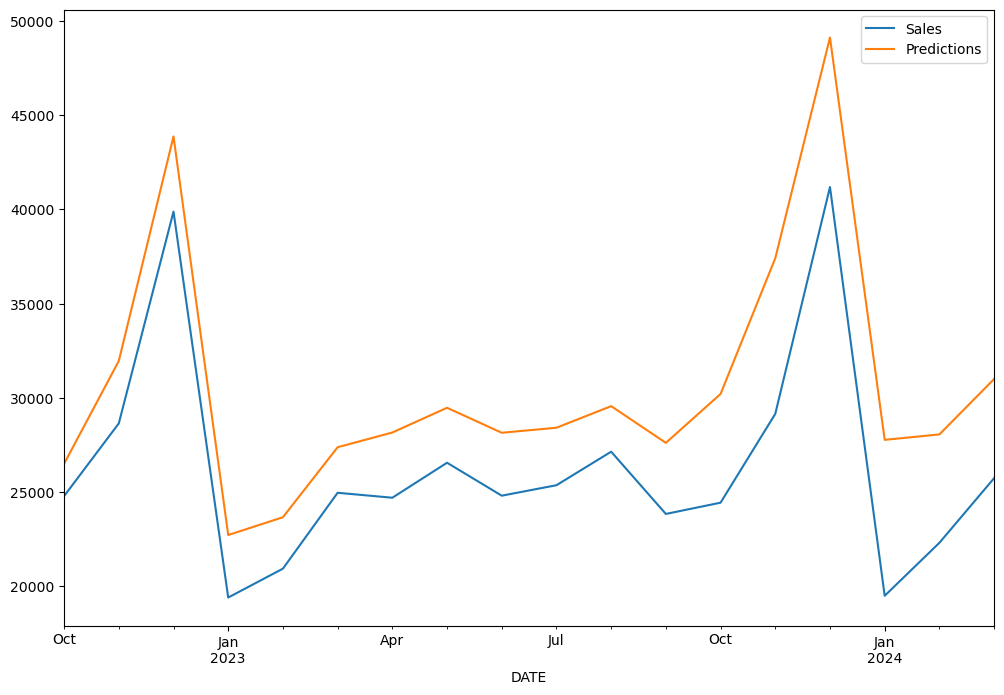

In [32]:
# Your code to plot actual sales and predictions.
test.plot(figsize=(12,8))

# Retrain and Forecasting

In [33]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [34]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [35]:
#
# Use any neural network model based on RNN
#
# Create the model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))


In [36]:
# compile the model
model.compile(optimizer='adam', loss='mse')

In [37]:
# use early_stop
early_stop = EarlyStopping(monitor='loss',patience=5)

In [38]:
# fit the model
history_2 =  model.fit(generator, epochs=30, callbacks=[early_stop])

Epoch 1/30
375/375 [==============================] - 7s 13ms/step - loss: 0.0171
Epoch 2/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0136
Epoch 3/30
375/375 [==============================] - 3s 9ms/step - loss: 0.0102
Epoch 4/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0065
Epoch 5/30
375/375 [==============================] - 6s 15ms/step - loss: 0.0055
Epoch 6/30
375/375 [==============================] - 5s 14ms/step - loss: 0.0048
Epoch 7/30
375/375 [==============================] - 5s 14ms/step - loss: 0.0040
Epoch 8/30
375/375 [==============================] - 5s 14ms/step - loss: 0.0038
Epoch 9/30
375/375 [==============================] - 5s 13ms/step - loss: 0.0034
Epoch 10/30
375/375 [==============================] - 3s 9ms/step - loss: 0.0034
Epoch 11/30
375/375 [==============================] - 4s 9ms/step - loss: 0.0028
Epoch 12/30
375/375 [==============================] - 3s 8ms/step - loss: 0.0028
Epoch 13/30
375/3

In [39]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for  grabbing just the number instead of [array])
    
    
    # store prediction forecast.append(current_pred) 
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 40ms/step


In [40]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.

In [41]:
df

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2023-11-01,29150.0
2023-12-01,41187.0
2024-01-01,19497.0


In [42]:
forecast_index = pd.date_range(start='2024-01-01',periods=periods,freq='MS')

In [43]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [44]:
forecast_df

,Forecast
2024-01-01,26251.142505
2024-02-01,28859.534014
2024-03-01,28120.173126
2024-04-01,28208.981559
2024-05-01,30255.426263
2024-06-01,27445.372053
2024-07-01,27413.050522
2024-08-01,31175.885486
2024-09-01,43429.041430
2024-10-01,22232.407765


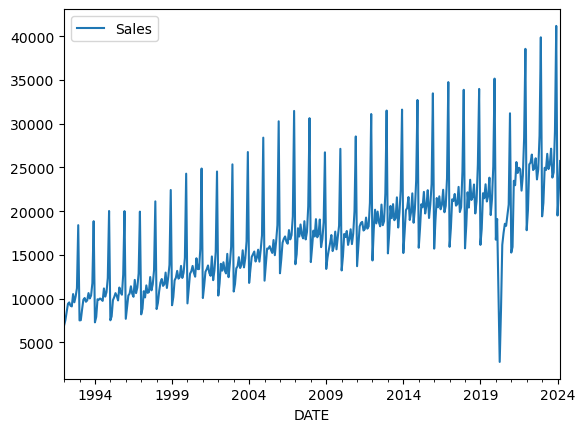

In [45]:
# Plot sales - Values in dataframe
df.plot();

<Axes: >

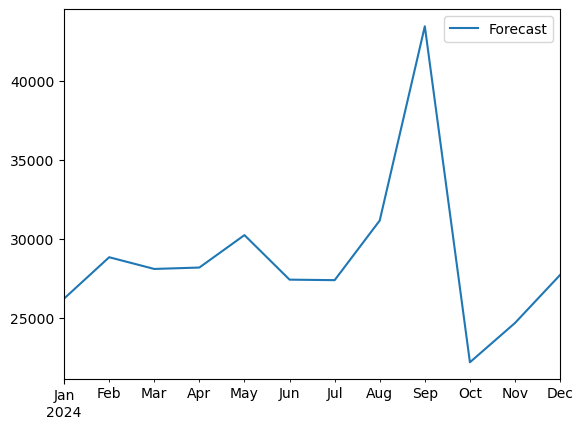

In [46]:
# Plot forecast - Values in forecast_df
forecast_df.plot()

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

<Axes: xlabel='DATE'>

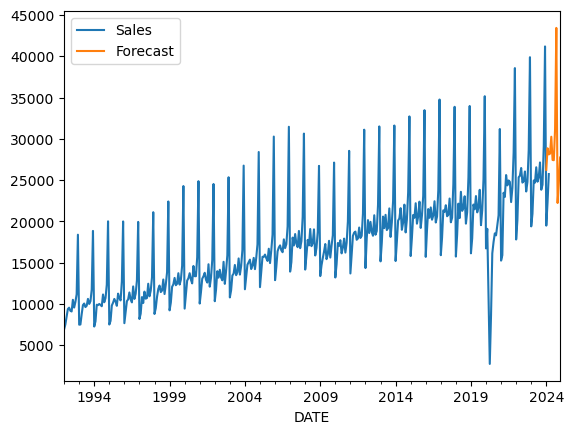

In [47]:
ax = df.plot()
forecast_df.plot(ax=ax)

(624.0, 660.0)

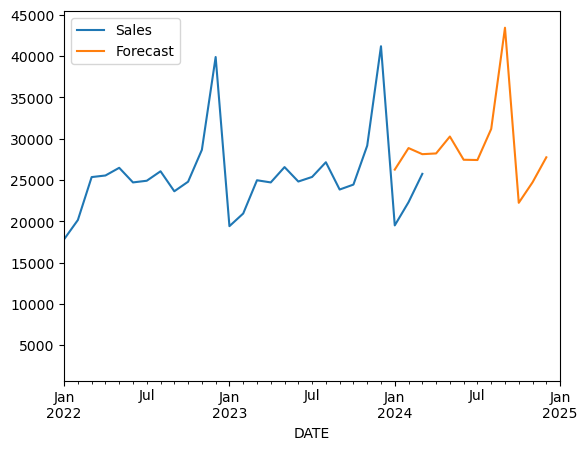

In [48]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2022-01-01','2025-01-01')

# Try the same example with a LSTM and GRU! 
Hint: Use LSTM instead of SimpleRNN!